<a href="https://colab.research.google.com/github/rohailkhan/Keras-Deeplearning-Francos/blob/master/Copy_of_0504_Time_Invariant_Face_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# بسم الله الرحمن الرحيم
اللهم صل على محمد وعلى آل محمد كما صليت على إبراهيم وعلى آل إبراهيم إنك حميد مجيد، اللهم بارك على محمد وعلى آل محمد كما باركت على إبراهيم وعلى آل إبراهيم إنك حميد مجيد




In [36]:
from keras.models import Sequential
"""Import from keras_preprocessing not from keras.preprocessing, 
because Keras may or maynot contain the features discussed here 
depending upon when you read this article, until the keras_
preprocessed library is updated in Keras use the github version."""
from keras_preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras import regularizers, optimizers
import pandas as pd
import numpy as np


Using TensorFlow backend.


In [0]:
import matplotlib.pyplot as plt

In [0]:
import os ,PIL

Convert Images to black and white

In [0]:
'''
source='E:\\Time-Invariant-Aging-Model-master\\fgsmallbw'
list=os.listdir(source)
for i in list:
    PIL.Image.open(i).convert('L').save(i)

In [0]:
#making the current working directory
os.chdir('/content/drive/My Drive/Aging model')

In [0]:
source='/content/drive/My Drive/Aging model/'

In [0]:
os.chdir(source)

In [0]:
# Put all files into a single dataframe
list_dir = [i for i in os.listdir('datafiles')]

In [0]:
# Put all files into a single dataframe
list_dir = [i for i in os.listdir('datafiles')]
final_df = pd.DataFrame(columns=['ID','Facial Index','Mandibular Index','Intercantal Index','Orbital Width Index','Eye Fissure Index','Vermilion Height Index','Mouth Face Width Index','AGE'])
interim_df = pd.DataFrame(columns=['ID','Facial Index','Mandibular Index','Intercantal Index','Orbital Width Index','Eye Fissure Index','Vermilion Height Index','Mouth Face Width Index','AGE'])
age_list=list()
for d in list_dir:
    interim_df.at[0,  ['Facial Index','Mandibular Index','Intercantal Index','Orbital Width Index','Eye Fissure Index','Vermilion Height Index','Mouth Face Width Index']] = pd.read_csv('datafiles/'+d, sep=" ", header=None).values[0][:7]
    interim_df['AGE'] = int(d[4:].replace('.txt','').replace('a','').replace('b',''))
    interim_df['ID'] = int(d[:3])
    final_df = pd.concat([final_df,interim_df])
    
# sort values by age of same person
final_df = final_df.sort_values(['ID','AGE'],ascending=True)

Saving in CSV

In [0]:
image_names=[]
for i in os.listdir('/content/drive/My Drive/Aging model/fgbw'):
  image_names.append(i)

In [0]:
image_names=sorted(image_names)

In [0]:
final_df['file_name']=image_names

In [0]:
final_df.to_csv('/content/drive/My Drive/Aging model/final_df.csv')

# Splitting data in training and validation(test) sets

In [0]:
final_df=pd.read_csv('/content/drive/My Drive/Aging model/final_df.csv')

In [0]:
X= final_df[  ['Facial Index','Mandibular Index','Intercantal Index','Orbital Width Index','Eye Fissure Index','Vermilion Height Index','Mouth Face Width Index']]
y= final_df[['AGE']]

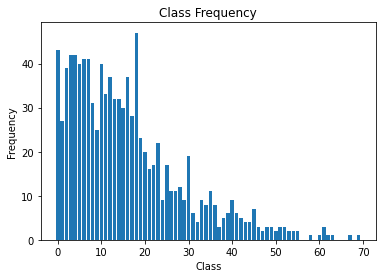

In [0]:
classes=y.values
unique, counts = np.unique(classes, return_counts=True)
plt.bar(unique,counts)
plt.title('Class Frequency')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

In [0]:
len(unique)

63

In [0]:
train_size = len(final_df['ID'].unique()) * .7

In [0]:
train = pd.DataFrame()
valid = pd.DataFrame()
for n,i in enumerate(final_df['ID'].unique()):
    if n< train_size:
        train = pd.concat([train, final_df[final_df['ID']==i]])
    else:
        valid = pd.concat([valid, final_df[final_df['ID']==i]])

In [0]:
print('Training Set Has: ' + str(len(train.groupby('ID').count())) + ' people')
print('Validation (Test) Set Has: ' + str(len(valid.groupby('ID').count())) + ' people')

Training Set Has: 58 people
Validation (Test) Set Has: 24 people


In [0]:
X_train = train[  ['file_name','Facial Index','Mandibular Index','Intercantal Index','Orbital Width Index','Eye Fissure Index','Vermilion Height Index','Mouth Face Width Index']]
y_train = train['AGE']

X_valid = valid[  ['file_name','Facial Index','Mandibular Index','Intercantal Index','Orbital Width Index','Eye Fissure Index','Vermilion Height Index','Mouth Face Width Index']]
y_valid = valid['AGE']

In [0]:
classes=y_train.values
unique, counts = np.unique(classes, return_counts=True)
print(len(unique))

63


# We have 63 age labels .So we have 63 classes, We use one hot encoding for this

In [0]:
'''
#Keras one hot encoding will not work as .So better
# so better concat the y_train and y_label to get dummies
from tensorflow.keras.utils import to_categorical
NB_CLASSES = 63 # number of outputs = number of digits
#One-hot representation of the labels.
y_train = to_categorical(y_train, NB_CLASSES)
y_valid = to_categorical(y_valid, NB_CLASSES)
print(X_train.shape,y_train.shape,X_valid.shape,y_valid.shape)

In [0]:
print(X_train.shape,y_train.shape,X_valid.shape,y_valid.shape)

(701, 8) (701,) (301, 8) (301,)


In [0]:
X_train.head(2)

,file_name,Facial Index,Mandibular Index,Intercantal Index,Orbital Width Index,Eye Fissure Index,Vermilion Height Index,Mouth Face Width Index
0,001A02.JPG,0.806070,0.336661,0.390837,0.828399,0.521382,0.599030,0.346350
1,001A05.JPG,0.852819,0.442643,0.386980,0.774311,0.461004,0.659254,0.393676


In [0]:
y_train.head(5)

0     2
1     5
2     8
3    10
4    14
Name: AGE, dtype: int64

In [0]:
#Example Dataframes 
# Concat with keys then get dummies
temp = pd.get_dummies(pd.concat([y_train,y_valid],keys=[0,1]))

# Selecting data from multi index and assigning them i.e

y_train,y_valid = temp.xs(0),temp.xs(1)

In [0]:
print(X_train.shape,y_train.shape,X_valid.shape,y_valid.shape)

(701, 8) (701, 63) (301, 8) (301, 63)


In [0]:
X_train.shape

(701, 8)

In [0]:
y_valid.columns

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
            51, 52, 53, 54, 55, 58, 60, 61, 62, 63, 67, 69],
           dtype='int64')

In [0]:
X_train.columns

Index(['file_name', 'Facial Index', 'Mandibular Index', 'Intercantal Index',
       'Orbital Width Index', 'Eye Fissure Index', 'Vermilion Height Index',
       'Mouth Face Width Index'],
      dtype='object')

# Pre proocssing X_train & Validation
## keeping only file names in X_train and X_validation

In [0]:
X_train.columns

Index(['file_name', 'Facial Index', 'Mandibular Index', 'Intercantal Index',
       'Orbital Width Index', 'Eye Fissure Index', 'Vermilion Height Index',
       'Mouth Face Width Index'],
      dtype='object')

In [0]:
X_train.drop(X_train.columns[[1,2,3,4,5,6,7]], axis = 1, inplace = True) 

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [0]:
X_train.columns

Index(['file_name'], dtype='object')

In [0]:
X_valid.drop(X_valid.columns[[1,2,3,4,5,6,7]], axis = 1, inplace = True) 

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [0]:
y_train.columns

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
            51, 52, 53, 54, 55, 58, 60, 61, 62, 63, 67, 69],
           dtype='int64')

# Saving 

In [0]:
y_train.to_csv('/content/drive/My Drive/Aging model/y_train.csv')
y_valid.to_csv('/content/drive/My Drive/Aging model/y_valid.csv')
X_train.to_csv('/content/drive/My Drive/Aging model/X_train.csv')
X_valid.to_csv('/content/drive/My Drive/Aging model/X_valid.csv')

In [0]:
'''y_valid.drop(y_valid.columns[[0]], axis = 1, inplace = True)
  y_train.drop(y_train.columns[[0]], axis = 1, inplace = True)

# Start Here : Loading CSVs for prepared data

In [0]:
y_train=pd.read_csv('/content/drive/My Drive/Aging model/y_train.csv')
y_valid=pd.read_csv('/content/drive/My Drive/Aging model/y_valid.csv')
X_train=pd.read_csv('/content/drive/My Drive/Aging model/X_train.csv')
X_valid=pd.read_csv('/content/drive/My Drive/Aging model/X_valid.csv')

In [0]:
y_valid.drop(y_valid.columns[[0]], axis = 1, inplace = True)
y_train.drop(y_train.columns[[0]], axis = 1, inplace = True)

In [0]:
X_train.drop(X_train.columns[[0]], axis = 1, inplace = True)
X_valid.drop(X_valid.columns[[0]], axis = 1, inplace = True)

In [66]:
print(X_train.shape,X_valid.shape,y_train.shape,y_valid.shape)

(701, 1) (301, 1) (701, 63) (301, 63)


In [0]:
X_data= pd.concat([X_train, X_valid], axis=0)
y_data= pd.concat([y_train, y_valid], axis=0)

In [0]:
X_data.reset_index(drop=True, inplace=True)
y_data.reset_index(drop=True, inplace=True)

# Concacnate bothe CSVs in single file called "COMBINED"
with first column as file name and the remaining as the labels

In [0]:
#use axis=1 for columns
combined=pd.concat([X_data, y_data1], axis=1)

In [0]:
combined.reset_index(drop=True, inplace=True)

In [70]:
combined['file_name'][699:702]

699     058A15.JPG
700     058A17.JPG
701    059A02a.JPG
Name: file_name, dtype: object

In [113]:
combined.dtypes

file_name    object
0             int64
1             int64
2             int64
3             int64
              ...  
61            int64
62            int64
63            int64
67            int64
69            int64
Length: 64, dtype: object

In [0]:
combined.to_csv('/content/drive/My Drive/Aging model/combined.csv')

## Loading from CSV 

In [0]:
# combined=pd.read_csv('/content/drive/My Drive/Aging model/combined.csv')

In [72]:
combined.columns

Index(['file_name', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10',
       '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22',
       '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34',
       '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46',
       '47', '48', '49', '50', '51', '52', '53', '54', '55', '58', '60', '61',
       '62', '63', '67', '69'],
      dtype='object')

In [0]:
target_columns=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10',
       '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22',
       '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34',
       '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46',
       '47', '48', '49', '50', '51', '52', '53', '54', '55', '58', '60', '61',
       '62', '63', '67', '69']

In [0]:
len(target_columns)

63

Scaling Training and Validation data using ImageDataGenerator

In [0]:
datagen=ImageDataGenerator(rescale=1./255.)
valid_datagen=ImageDataGenerator(rescale=1./255.)

In [75]:
train_generator=datagen.flow_from_dataframe(
dataframe=combined[:701],
directory="/content/drive/My Drive/Aging model/fgbw",
x_col='file_name',
y_col=target_columns,
batch_size=32,
seed=42,
shuffle=True,class_mode='raw',
target_size=(150,150))

Found 701 validated image filenames.


In [76]:
valid_generator=datagen.flow_from_dataframe(
dataframe=combined[701:1002],
directory="/content/drive/My Drive/Aging model/fgbw",
x_col='file_name',
y_col=target_columns,
batch_size=32,
seed=42,
shuffle=True,class_mode='raw',
target_size=(150,150))

Found 301 validated image filenames.


In [77]:
for data_batch, labels_batch in train_generator:
  print('data batch shape:', data_batch.shape)
  print('labels batch shape:', labels_batch.shape)
  break

data batch shape: (32, 150, 150, 3)
labels batch shape: (32, 63)


In [0]:
model = Sequential()
model.add(Conv2D(32, (3, 3),activation='relu',
input_shape=(150, 150, 3))) # because bw len(image.getbands()=1 so use  1 )
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))

model.add(Dense(63, activation='softmax'))

# Note: For more than 2 classes,use categorical_crossentropy. and also =the activation on the last layer =softmax

## Check sizes and bands etc

In [0]:
from PIL import Image

m1='/content/drive/My Drive/Aging model/fgsmallbw/001A43a.JPG'
im = Image.open(m1)
print('shape= ' + str(im.size), 'bands of RGB or L= ' + str(im.getbands))
len(im.getbands())

shape= (415, 488) bands of RGB or L= <bound method Image.getbands of <PIL.JpegImagePlugin.JpegImageFile image mode=L size=415x488 at 0x7F8C8FD93CF8>>


1

In [0]:
model.compile(loss='categorical_crossentropy',
optimizer=optimizers.RMSprop(lr=1e-4),
metrics=['acc'])

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)      

In [0]:
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=valid_generator.n//valid_generator.batch_size

In [0]:
history=model.fit_generator(generator=train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=valid_generator,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=40)

# Saving model

In [0]:
model.save('/content/drive/My Drive/Aging model/model_no_aug.h5')

# Saving History

In [0]:
import json
# Get the dictionary containing each metric and the loss for each epoch
history_no_augment_dict = history.history
# Save it under the form of a json file
# json.dumps(str(a))
json.dump(str(history_no_augment_dict), open('/content/drive/My Drive/Aging model/history_no_augment_dict.json', 'w'))

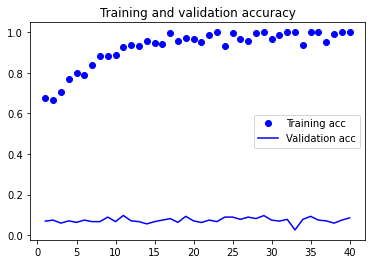

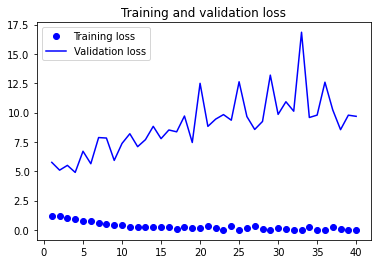

In [0]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

# Second model

In [0]:
model2 = Sequential()
model2.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=(150,150,3)))
model2.add(Activation('relu'))
model2.add(Conv2D(32, (3, 3)))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))
model2.add(Conv2D(64, (3, 3), padding='same'))
model2.add(Activation('relu'))
model2.add(Conv2D(64, (3, 3)))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))
model2.add(Flatten())
model2.add(Dense(512))
model2.add(Activation('relu'))
model2.add(Dropout(0.5))
model2.add(Dense(63, activation='softmax'))


In [0]:
model2.compile(loss='categorical_crossentropy',
optimizer=optimizers.RMSprop(lr=1e-4),
metrics=['acc'])

In [0]:
history2=model2.fit_generator(generator=train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=valid_generator,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=15)

# Saving Model 2

In [0]:
model2.save('/content/drive/My Drive/Aging model/model_no_aug2.h5')

# Saving History of Model2

In [0]:
import json
# Get the dictionary containing each metric and the loss for each epoch
history_no_augment_dict2 = history2.history
# Save it under the form of a json file
# json.dumps(str(a))
json.dump(str(history_no_augment_dict2), open('/content/drive/My Drive/Aging model/history_no_augment_dict2.json', 'w'))

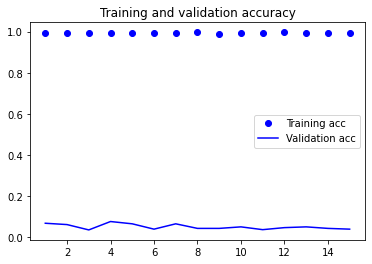

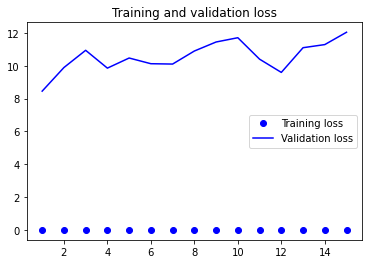

In [0]:
import matplotlib.pyplot as plt
acc = history2.history['acc']
val_acc = history2.history['val_acc']
loss = history2.history['loss']
val_loss = history2.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

# Using Face Augmentation

In [0]:
datagen = ImageDataGenerator(
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,
fill_mode='nearest')

# Using model 1 (145) in the augmentation

In [0]:
model3 = Sequential()
model3.add(Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model3.add(MaxPooling2D((2, 2)))
model3.add(Conv2D(64, (3, 3), activation='relu'))
model3.add(MaxPooling2D((2, 2)))
model3.add(Conv2D(128, (3, 3), activation='relu'))
model3.add(MaxPooling2D((2, 2)))
model3.add(Conv2D(128, (3, 3), activation='relu'))
model3.add(MaxPooling2D((2, 2)))
model3.add(Flatten())
model3.add(Dropout(0.5))
model3.add(Dense(512, activation='relu'))
model3.add(Dense(63, activation='softmax'))

In [0]:
model3.compile(loss='categorical_crossentropy',
optimizer=optimizers.RMSprop(lr=1e-4),
metrics=['acc'])

## Defining Augmentation object using ImageDataGenerator

In [0]:
all_columns = list(combined) # Creates list of all column headers


In [0]:
combined[all_columns] = combined[all_columns].astype('category')

In [126]:
combined.dtypes

file_name    category
0            category
1            category
2            category
3            category
               ...   
61           category
62           category
63           category
67           category
69           category
Length: 64, dtype: object

In [0]:
target_columns=combined.loc[:, combined.columns != 'file_name']

In [128]:
target_columns.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36',
       '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48',
       '49', '50', '51', '52', '53', '54', '55', '58', '60', '61', '62', '63',
       '67', '69'],
      dtype='object')

In [0]:
train_datagen = ImageDataGenerator(
rescale=1./255,
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,)

Defining Train and Validation generator

In [0]:
train_generator=train_datagen.flow_from_dataframe(
dataframe=combined[:701],
directory="/content/drive/My Drive/Aging model/fgbw",
x_col='file_name',
y_col=target_columns,
batch_size=32,
seed=42,
shuffle=True,class_mode='raw',
target_size=(150,150))

## Note .Validation data is not augmented

In [110]:
valid_datagen = ImageDataGenerator(rescale=1./255)

valid_generator=valid_datagen.flow_from_dataframe(
dataframe=combined[701:1002],
directory="/content/drive/My Drive/Aging model/fgbw",
x_col='file_name',
y_col=target_columns,
batch_size=32,
seed=42,
shuffle=True,class_mode='raw',
target_size=(150,150))

Found 301 validated image filenames.


In [0]:
history3 = model3.fit_generator(
train_generator,
steps_per_epoch=100,
epochs=100,
validation_data=valid_generator   ,
validation_steps=50)

In [0]:
model3.save('/content/drive/My Drive/Aging model/model_yes_aug3.h5')

In [0]:
# Get the dictionary containing each metric and the loss for each epoch
history_yes_augment_dict3 = history3.history
# Save it under the form of a json file
# json.dumps(str(a))
json.dump(str(history_yes_augment_dict3), open('/content/drive/My Drive/Aging model/history_yes_augment_dict3.json', 'w'))

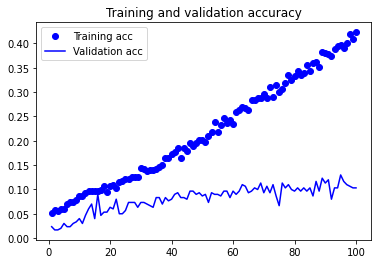

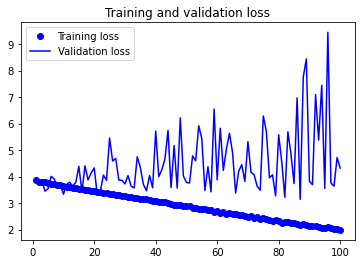

In [0]:
acc = history3.history['acc']
val_acc = history3.history['val_acc']
loss = history3.history['loss']
val_loss = history3.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

# Using 22 epochs this time and a smaller model

In [0]:
model3 = Sequential()
model3.add(Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model3.add(MaxPooling2D((2, 2)))
model3.add(Conv2D(64, (3, 3), activation='relu'))

model3.add(Flatten())
model3.add(Dropout(0.5))
model3.add(Dense(512, activation='relu'))
model3.add(Dense(63, activation='softmax'))

model3.compile(loss='categorical_crossentropy',
optimizer=optimizers.RMSprop(lr=0.00001),
metrics=['acc'])

In [0]:
history4 = model3.fit_generator(
train_generator,
steps_per_epoch=100,
epochs=100,
validation_data=valid_generator   ,
validation_steps=50)

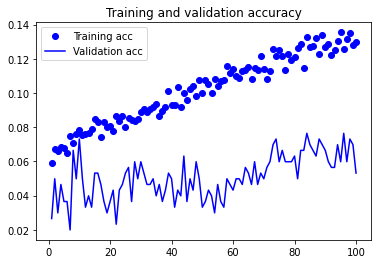

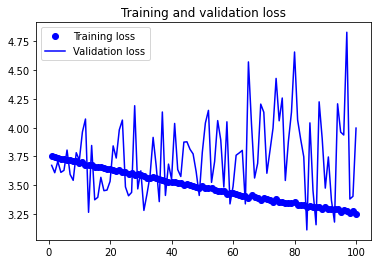

In [108]:
import matplotlib.pyplot as plt
acc = history4.history['acc']
val_acc = history4.history['val_acc']
loss = history4.history['loss']
val_loss = history4.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

# other data

In [0]:
df=pd.read_csv('/content/drive/My Drive/miml_dataset/miml_labels_1.csv')
columns=["desert", "mountains", "sea", "sunset", "trees"]
datagen=ImageDataGenerator(rescale=1./255.)
test_datagen=ImageDataGenerator(rescale=1./255.)
train_generator=datagen.flow_from_dataframe(
dataframe=df[:1800],
directory='/content/drive/My Drive/miml_dataset/images',
x_col="Filenames",
y_col=columns,
batch_size=32,
seed=42,
shuffle=True,
class_mode="raw",
target_size=(100,100))

Found 1800 validated image filenames.


In [0]:
df.head(2)

,Filenames,desert,mountains,sea,sunset,trees
0,1.jpg,1,0,0,0,0
1,2.jpg,1,0,0,0,0


In [0]:
for data_batch, labels_batch in train_generator:
  print('data batch shape:', data_batch.shape)
  print('labels batch shape:', labels_batch.shape)
  break

data batch shape: (32, 100, 100, 3)
labels batch shape: (32, 5)


In [0]:
datagen=ImageDataGenerator(rescale=1./255.)
test_datagen=ImageDataGenerator(rescale=1./255.)train_generator=datagen.flow_from_dataframe(
dataframe=df[:1800],
directory="./miml_dataset/images",
x_col="Filenames",
y_col="labels",
batch_size=32,
seed=42,
shuffle=True,
class_mode="categorical",
classes=["desert", "mountains", "sea", "sunset", "trees"],
target_size=(100,100))